In [129]:
import pandas as pd
import vectorbtpro as vbt
import cta_filter
import warnings
warnings.filterwarnings("ignore")
vbt.settings.set_theme("dark")
vbt.settings.portfolio['freq'] = '1h'
vbt.settings['plotting']['layout']['width'] = 1200
cta_filter.__all__

['sum_as_string', 'rsi', 'atr', 'filter1']

In [130]:
symbols = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'DOGEUSDT', 'XRPUSDT', 'BNBUSDT', '1000SHIBUSDT', 'AVAXUSDT', 'APTUSDT',
           'LTCUSDT', 'BCHUSDT', 'LINKUSDT', 'ADAUSDT', 'OPUSDT', 'FILUSDT', 'TRBUSDT', 'FTMUSDT', 'NEARUSDT',
           'ETCUSDT', 'GALAUSDT', 'DOTUSDT', 'INJUSDT', 'MASKUSDT', 'DYDXUSDT', 'APEUSDT', 'PEOPLEUSDT', 'CRVUSDT',
           'EOSUSDT', 'GMTUSDT', 'LDOUSDT', 'ATOMUSDT', 'SANDUSDT', 'UNIUSDT']
datas = vbt.HDFData.pull('../../../DATA/data_1h.h5')
def get_df(s):
    df = datas.data[s].copy()
    df['datetime'] = df.index
    df.reset_index(inplace=True, drop=True)
    return df
get_df(symbols[0])

  0%|          | 0/33 [00:00<?, ?it/s]

,Open,High,Low,Close,Volume,Quote volume,Trade count,Taker base volume,Taker quote volume,datetime
0,46210.57,46729.73,46210.55,46650.01,8957.465,4.164448e+08,91267,4777.701,2.221296e+08,2022-01-01 00:00:00+00:00
1,46650.00,46944.56,46570.34,46766.78,7276.249,3.403806e+08,73308,3689.837,1.726189e+08,2022-01-01 01:00:00+00:00
2,46767.44,46917.87,46709.44,46796.14,4478.713,2.096860e+08,46403,2103.345,9.848722e+07,2022-01-01 02:00:00+00:00
3,46796.15,46888.00,46746.32,46789.56,4208.992,1.970797e+08,39070,1928.027,9.028410e+07,2022-01-01 03:00:00+00:00
4,46789.55,46868.74,46605.00,46690.81,6149.298,2.872292e+08,63606,2855.818,1.334055e+08,2022-01-01 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
25531,97233.30,97492.50,96935.40,97380.00,4733.981,4.602411e+08,86834,2416.528,2.349360e+08,2024-11-29 19:00:00+00:00
25532,97380.00,97687.40,97240.00,97358.80,4225.784,4.117928e+08,68583,2226.684,2.169920e+08,2024-11-29 20:00:00+00:00
25533,97358.80,97485.00,97036.90,97440.00,3426.549,3.333877e+08,60363,1935.501,1.883307e+08,2024-11-29 21:00:00+00:00
25534,97440.00,97547.80,97280.80,97348.00,3255.084,3.171337e+08,58179,1898.137,1.849318e+08,2024-11-29 22:00:00+00:00


Start                                                 0
End                                               25535
Period                               1064 days 00:00:00
Start Value                                       100.0
Min Value                                     79.779501
Max Value                                    264.030589
End Value                                    253.552406
Total Return [%]                             153.552406
Benchmark Return [%]                         109.038112
Total Time Exposure [%]                       52.827381
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              32.532763
Max Drawdown Duration                 342 days 13:00:00
Total Orders                                        276
Total Fees Paid                                33.19785
Total Trades                                        138
Win Rate [%]                                  38.405797
Best Trade [%]                                28

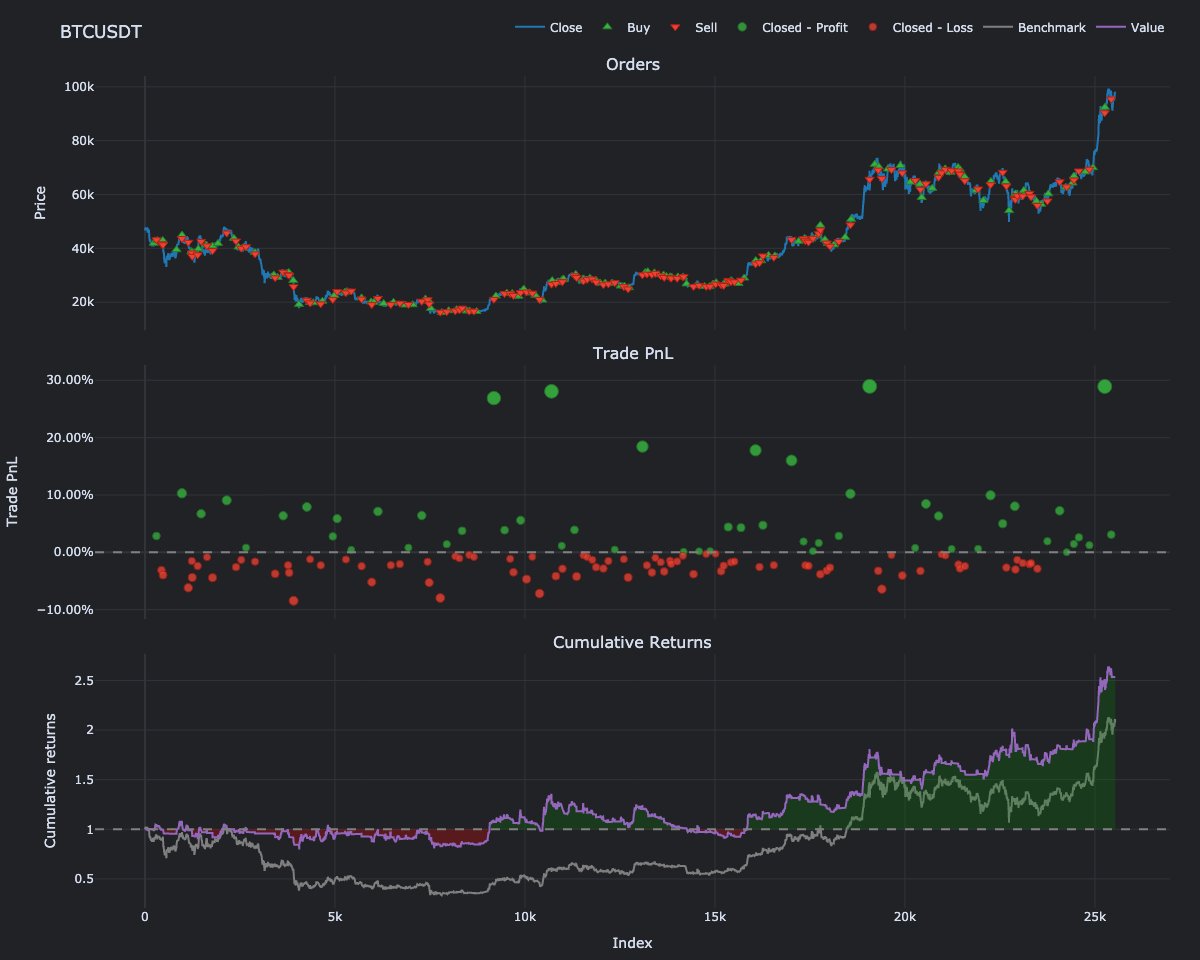

In [132]:
def test_filter(n=0):
    data = get_df(symbols[n])
    data['dir'] = pd.DataFrame(cta_filter.filter1(data['High'],data['Low'],data['Close'],20,2))
    pf = vbt.Portfolio.from_signals(
        data['Close'],
        long_entries=data['dir']>0, 
        long_exits=data['dir']<0,
        init_cash=100,
        fees=0.001,
        freq='1h',
        # sl_stop=0.1,
        # tsl_stop=0.1,
    )
    print(pf.stats())
    return pf.plot(width=1200,title=symbols[n]).show_png()
test_filter(0)

Start                                                 0
End                                               25535
Period                               1064 days 00:00:00
Start Value                                       100.0
Min Value                                     56.652147
Max Value                                    179.284769
End Value                                    175.677862
Total Return [%]                              75.677862
Benchmark Return [%]                          -3.417014
Total Time Exposure [%]                       53.665414
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              45.005978
Max Drawdown Duration                 562 days 03:00:00
Total Orders                                        269
Total Fees Paid                               26.572578
Total Trades                                        135
Win Rate [%]                                  35.820896
Best Trade [%]                                62

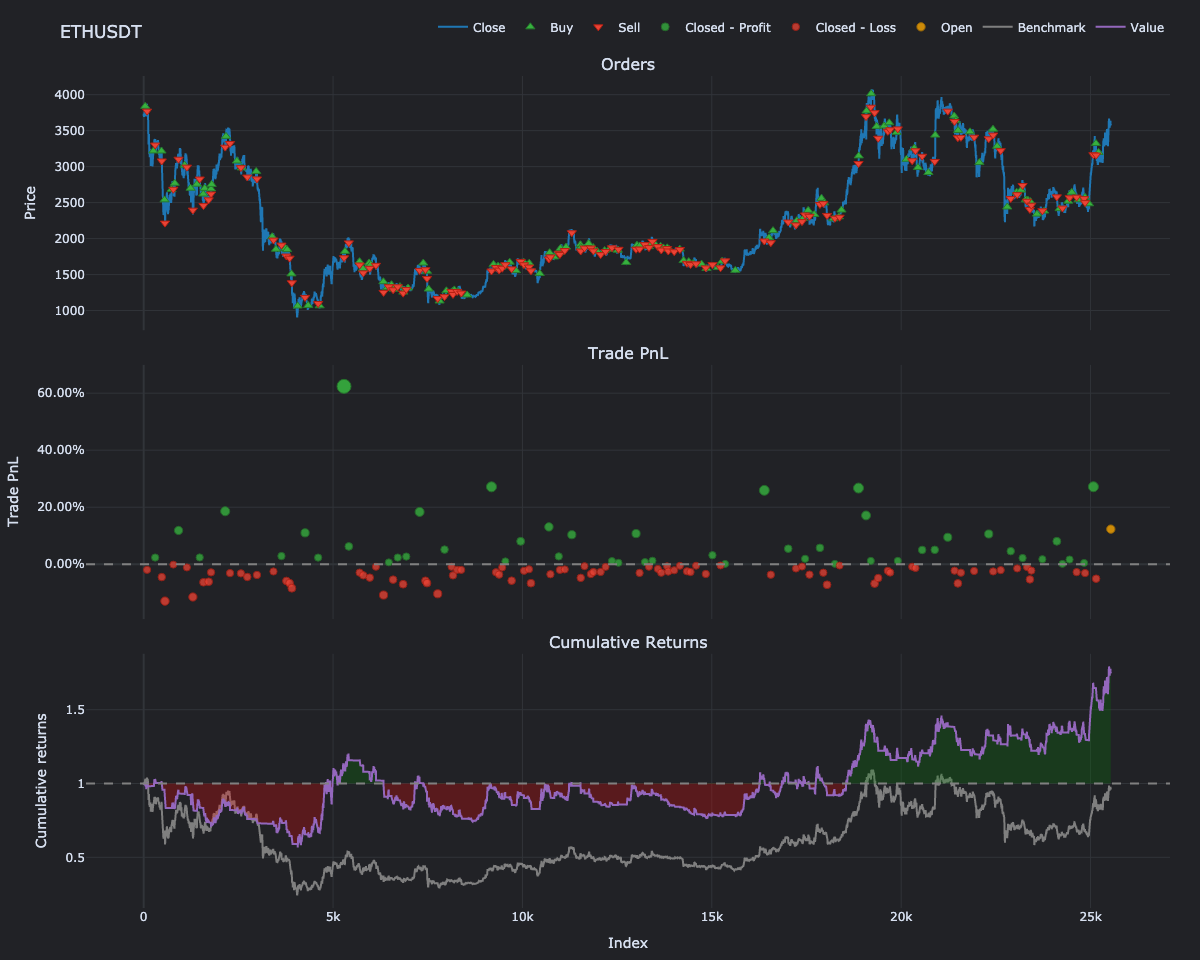

In [133]:
test_filter(1)

Start                                                 0
End                                               25535
Period                               1064 days 00:00:00
Start Value                                       100.0
Min Value                                     36.674573
Max Value                                    446.769688
End Value                                    383.654569
Total Return [%]                             283.654569
Benchmark Return [%]                          41.206497
Total Time Exposure [%]                       55.282738
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              66.601341
Max Drawdown Duration                 637 days 21:00:00
Total Orders                                        188
Total Fees Paid                               26.723834
Total Trades                                         94
Win Rate [%]                                  41.489362
Best Trade [%]                               152

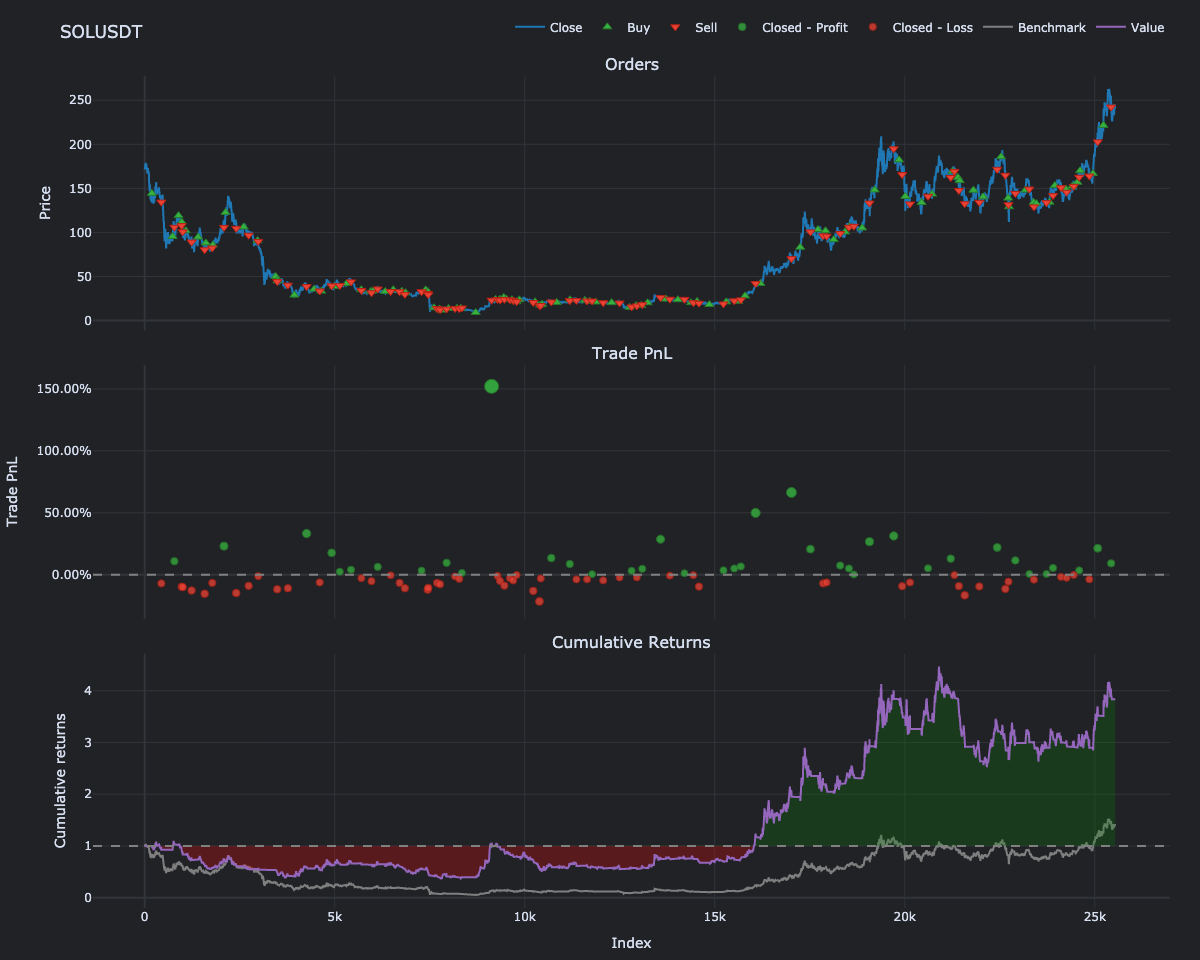

In [134]:
test_filter(2)